In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import os
from numpy import savetxt,loadtxt

################# Files  ##########################
# 1: bgr hist
# 2: hsv hist
# 3: shape
# 4: gray_clbp_S_M
# 5: hue_clbp_S_M


################# Constants #######################
B_SPOTS = -2
HEALTHY = -1
L_BLIGHT = 0
T_MOSAIC = 1
S_SPOTS = 2 
diseases = ['bspot','healthy','lblight','mosaic','sspot']
label_dict = {'bspot':B_SPOTS,'healthy':HEALTHY,'lblight':L_BLIGHT,'mosaic':T_MOSAIC,'sspot':S_SPOTS}
files = [1,2,3,4,5]


################ Variables #########################
X = []
Y = []
y = []




################ Feature Vector ####################
path = 'drive/My Drive/Final Year Project/Features'
flag = 0
flag2 = 0
for disease in diseases:
  read_path = os.path.join(path,disease)
  for file in files:
    f_name = str(file)+'.csv'
    file_path = os.path.join(read_path,f_name)

    if flag == 0:
      data = loadtxt(file_path,delimiter = ',')
      data = np.asarray(data)
    
    if len(files) >=2 and flag == 1:
      data1 = loadtxt(file_path,delimiter = ',')
      data1 = np.asarray(data1)
      data = np.concatenate((data,data1),axis = 1)

    
    
    flag = 1
  print(data.shape)
  flag = 0 
  temp = np.zeros(60)
  temp.fill(label_dict[disease])
  if flag2 == 0:
    feature_data = data
    label = temp
  if flag2 == 1:
    feature_data = np.concatenate((feature_data,data))
    label = np.concatenate((label,temp))
  flag2 = 1  

features = feature_data
print(feature_data.shape)
print(label.shape)  

(60, 1755)
(60, 1755)
(60, 1755)
(60, 1755)
(60, 1755)
(300, 1755)
(300,)


In [0]:
########################## Feature Scaling ###################################
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=20,stratify = label)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [0]:
########################### Hyperparamter Tuning ################################# 
from sklearn import svm
from sklearn.model_selection import GridSearchCV 

parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['poly'], 'C': [ 1,10, 100, 1000,],'degree':[1,2,3]},
             {'kernel': ['linear'], 'C': [ 1,10, 100, 1000,]} ]
svc = svm.SVC()
clf = GridSearchCV(svc,parameters,scoring='accuracy')
clf.fit(X_train,y_train)
print(clf.best_score_)
print(clf.best_params_)

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
  print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))

0.976190476190476
{'C': 10, 'degree': 1, 'kernel': 'poly'}
0.938 (+/-0.065) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.919 (+/-0.049) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.938 (+/-0.077) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.971 (+/-0.076) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.938 (+/-0.077) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.971 (+/-0.056) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.938 (+/-0.077) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.971 (+/-0.056) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.957 (+/-0.056) for {'C': 1, 'degree': 1, 'kernel': 'poly'}
0.781 (+/-0.082) for {'C': 1, 'degree': 2, 'kernel': 'poly'}
0.710 (+/-0.047) for {'C': 1, 'degree': 3, 'kernel': 'poly'}
0.976 (+/-0.043) for {'C': 10, 'degree': 1, 'kernel': 'poly'}
0.900 (+/-0.139) for {'C': 10, 'degree': 2, 'kernel': 'poly'}
0.829 (+/-0.070) for {'C': 10, 'degree': 3, 'kernel': 'poly'}
0.976 (+/-0.043) for {'C': 100, 'degree': 1, 'kernel

In [0]:
#################### K Fold Validated Accuracy ########################
from sklearn.model_selection import cross_val_score,StratifiedShuffleSplit,cross_validate
from sklearn.pipeline import make_pipeline

cv = StratifiedShuffleSplit(n_splits = 5, test_size = 0.3,random_state = 2)

classifier = svm.SVC(kernel = 'linear')

clf = make_pipeline(StandardScaler(),classifier)
score  = cross_val_score(clf,features,label,cv = cv)
print(score)
print(score.mean())

cv_results = cross_validate(clf, features, label,cv = 5 )
print(cv_results['test_score'])
print(cv_results['test_score'].mean())

[0.97777778 0.97777778 0.97777778 0.98888889 0.94444444]
0.9733333333333333
[0.95       0.96666667 0.98333333 0.96666667 1.        ]
0.9733333333333334


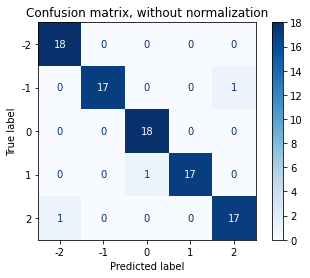

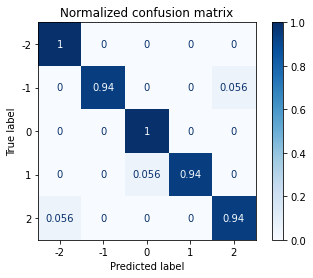

              precision    recall  f1-score   support

        -2.0      0.947     1.000     0.973        18
        -1.0      1.000     0.944     0.971        18
         0.0      0.947     1.000     0.973        18
         1.0      1.000     0.944     0.971        18
         2.0      0.944     0.944     0.944        18

    accuracy                          0.967        90
   macro avg      0.968     0.967     0.967        90
weighted avg      0.968     0.967     0.967        90



In [0]:
########################### Confusion Matrix  ##################################

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from matplotlib.pyplot import figure

np.set_printoptions(precision=2)
class_names = ['B_SPOTS','HEALTHY','L_BLIGHT','T_MOSAIC','S_SPOTS']
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_true = y_test
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
label = [-2,-1,0,1,2]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=label,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    # print(title)
    # print(disp.confusion_matrix)


fig = plt.gcf()
plt.show()
#fig.savefig('conf_matrix_norm2.png',dpi = 100)
print(classification_report(y_true, y_pred, digits=3))